In [1]:
#data_processing
import jieba 
import pandas as pd
import re

data = pd.read_csv('clean_data.csv')
comments= []
labels = []
for i in range(len(data['comments'])):#由于当时给数据加标签的时候 有极少数中性评论 非常影响训练效果 所以过一个循环去除  
    if data['labels'][i] != 1:
        comments.append(data['comments'][i])
        if data['labels'][i] == 2 :
            labels.append(data['labels'][i]-1)
        else:
            labels.append(data['labels'][i])
print(len(comments),len(labels))#输出评论和标签的长度
def clean_data(a_list):   # 清理数据
    data = []
    for i in a_list:
        re.sub('\d+','',i) #使用正则去除数字
        i = jieba.lcut(i.strip())#jieba分词
        for x in range(len(i)):
            try :
                i.remove(' ')#使用正则把分词中的空格去掉
            except:
                break
        data.append(i)
    return data
        
data = clean_data(comments)     
data 


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DELL\AppData\Local\Temp\jieba.cache


1454 1454


Loading model cost 0.637 seconds.
Prefix dict has been built successfully.


[['你',
  '以为',
  '你',
  '已经',
  '很',
  '爱',
  '很',
  '爱',
  '妈妈',
  '了',
  '但',
  '妈妈',
  '远比',
  '你',
  '想象',
  '中',
  '更',
  '爱',
  '更',
  '爱',
  '更',
  '爱',
  '你'],
 ['有',
  '笑',
  '有',
  '泪',
  '的',
  '不',
  '明白',
  '陈赫',
  '这个',
  '人物',
  '有',
  '什么',
  '作用',
  '完全',
  '多余'],
 ['贾玲', '我', '给', '你们', '讲个', '笑话', '你们', '别哭'],
 ['我宝',
  '那句',
  '出来',
  '的',
  '时候',
  '真的',
  '直接',
  '泪奔',
  '我',
  '以为',
  '只有',
  '我',
  '回到',
  '了',
  '我',
  '以为',
  '我',
  '可以',
  '牺牲',
  '我',
  '自己',
  '改变',
  '你',
  '往后',
  '的',
  '命运',
  '我',
  '以为',
  '你',
  '可以',
  '更',
  '幸福',
  '的',
  '我',
  '没想到',
  '你',
  '愿意',
  '过',
  '的',
  '就是',
  '摊上',
  '我',
  '的',
  '这',
  '一生'],
 ['国产',
  '喜剧',
  '催泪',
  '烂片',
  '这是',
  '豆瓣',
  '一贯',
  '的',
  '规律',
  '因此',
  '我',
  '知道',
  '自己',
  '的',
  '评分',
  '一定',
  '不会',
  '公允',
  '这里',
  '有',
  '掺杂',
  '太多',
  '我',
  '的',
  '主观',
  '感受',
  '有生以来',
  '第一次',
  '在',
  '电影院',
  '哭',
  '得',
  '泣不成声',
  '昨晚',
  '是',
  '除夕',
  '我',
  '和',
  '妈妈',
  '大吵',
  '了',
  '一架'

In [2]:
from gensim.models import KeyedVectors #加载word2vec词向量 

model = KeyedVectors.load_word2vec_format("100000-small.txt")#训练词向量 使用的是小型腾讯100000词库 也试过使用自己的数据集 训练效果比这个差一点点


In [3]:
def vec_index(text): #将每句话转化成词向量的形式
    text = jieba.lcut(text.strip())#评论分词
    for i in range(len(text)):
        try :
            index = model.wv.vocab[text[i]].index#获取每个词的下标
            text[i] = index
        except: #如果找不到这个词就下标为0
            text[i] = 0
    return text


for i in range(len(comments)):#给每个评论转化为词向量的形式
    comments[i] = vec_index(comments[i])

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [4]:
for i,j in enumerate(model.wv.similar_by_word('哭')):#查看词向量中 与哭最接近的10个词
    print(i,j)
model.save('model.model')#保存词向量的模型

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0 ('哭起来', 0.8399369120597839)
1 ('哭了', 0.8398892879486084)
2 ('哭啊', 0.8290536403656006)
3 ('掉眼泪', 0.8216835856437683)
4 ('大哭', 0.8184555172920227)
5 ('一直哭', 0.8084511756896973)
6 ('你哭', 0.8043060898780823)
7 ('我哭', 0.8015668392181396)
8 ('她哭', 0.8014125823974609)
9 ('嚎啕大哭', 0.7973282337188721)


In [1]:
from keras.datasets import imdb#加载神经网络相关库  直接使用keras或者tensorflow.keras也一样
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding,LSTM,Bidirectional,Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

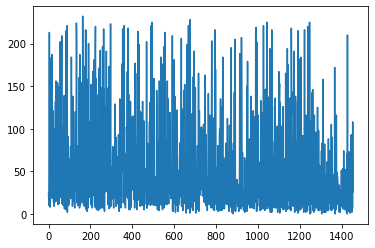

In [6]:
x_train,x_test,y_train,y_test = train_test_split(comments,labels,test_size = 0.2,random_state = 0)#对评论分为测试集 训练集 测试集的大小为0.2 

length = []
for i in comments :
    length.append(len(i)) #查看每个评论的大小 以便对数据进行归一处理
plt.plot(length)

In [7]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=200)#这里统一把评论的长度pad为200 一是为了更好的
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=200) #处理成神经网络容易接受的形式
x_train = np.array(x_train)#把数据转为np数组
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [8]:
nb = MultinomialNB()  #加载贝叶斯模型
svm = svm.SVC(kernel = 'rbf',decision_function_shape='ovo') #加载向量机 一对一模式 使用的线性核这个有点忘了哈哈

svm.fit(x_train,y_train)#训练
svm.score(x_test,y_test)#评估


0.5120274914089347

In [9]:
nb.fit(x_train,y_train)#朴素贝叶斯的训练
nb.score(x_test,y_test)#评估

0.5567010309278351

In [10]:
model_keras = Sequential()#双向lstm
model_keras.add(Embedding(100000,64))#embedding层主要用来嵌入词向量

model_keras.add(Bidirectional(LSTM(64)))#双向lstm训练
model_keras.add(Dropout(0.3))#drop是使部分神经点失活 这里比例是0.3
model_keras.add(Dense(16,activation = 'relu'))#dense层压缩
model_keras.add(Dense(2,activation = 'softmax'))#dense层使用softmax分类 分成两类 正向和负向
model_keras.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['acc'])#编译模型
model_keras.summary()#对模型的总结 就是下面刚开始看见的那个

history = model_keras.fit(#训练 分成十次
    x_train,y_train,
    epochs=10,
    batch_size = 32,
    validation_data= (x_test,y_test)#测试集
)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          6400000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 6,468,146
Trainable params: 6,468,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
37/37 [==============================] - 5s 133ms/step - loss: 0.6894 - acc: 0.5400 - val_loss: 0.681

In [15]:

x = model_keras.predict(x_train)
x[1][1]
#y_train[0]

0.0017561484

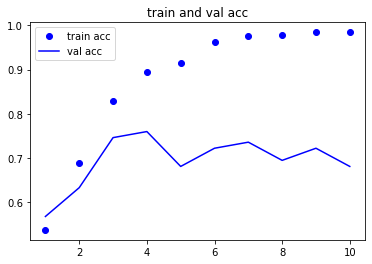

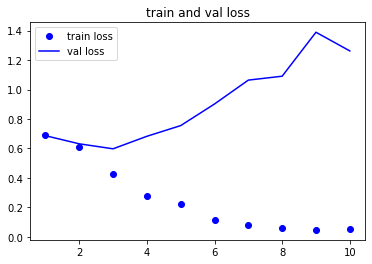

In [160]:
#绘制结果
#第一个图是训练集和测试集的准确率

#第二个图是测试集和训练集的损失值

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'train acc')
plt.plot(epochs,val_acc,'b',label = 'val acc')
plt.title('train and val acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'train loss')
plt.plot(epochs,val_loss,'b',label = 'val loss')
plt.title('train and val loss')
plt.legend()
plt.show()

In [182]:
#cnn
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPool1D
#这是卷积层的基本结构 原理的话稍微了解就行 主要还是看上面的把
model_cnn = Sequential()
model_cnn.add(Embedding(100000,128,input_length = 200))
model_cnn.add(Conv1D(32,7,activation='relu'))#一维卷积
model_cnn.add(MaxPooling1D(5))#最大池化层
model_cnn.add(Conv1D(32,7,activation='relu'))#在卷积
model_cnn.add(GlobalMaxPool1D())#全局最大池化层 
model_cnn.add(Dense(16,activation = 'relu'))
model_cnn.add(Dense(1,activation = 'sigmoid'))
model_cnn.summary()
model_cnn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


history = model_cnn.fit(
    x_train,y_train,
    epochs=10,
    batch_size = 32,
    validation_data= (x_test,y_test)
   
)






Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 200, 128)          12800000  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 194, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_59 (Dense)             (None, 1)               

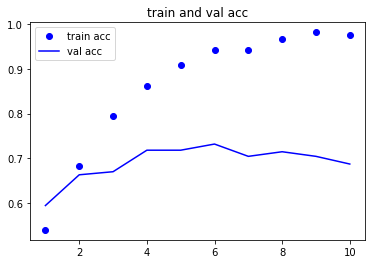

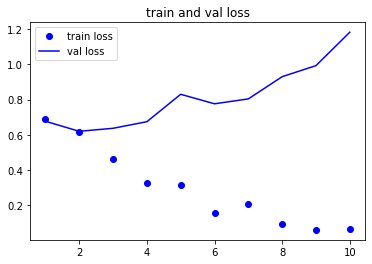

In [185]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'train acc')
plt.plot(epochs,val_acc,'b',label = 'val acc')
plt.title('train and val acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'train loss')
plt.plot(epochs,val_loss,'b',label = 'val loss')
plt.title('train and val loss')
plt.legend()
plt.show()

In [156]:

text =[ '这个电影有点糟糕','叙事情节丰富 比其他电影更有节奏感','总体没有清晰的故事线 叙事也看得不清不楚的 不好看'
      ] #预测

'''for i in range(len(text)):
    text[i] = vec_index(text[i])
text  = preprocessing.sequence.pad_sequences(text,maxlen = 200)
text = np.array(text)
result = model_keras.predict_classes(text)
'''

#对评论的一个预测 这个其实无所谓 就是展示一下训练的效果 可加可不加
def network_predict(text):


    for i in range(len(text)):
        text[i] = vec_index(text[i])
    text  = preprocessing.sequence.pad_sequences(text,maxlen = 200)
    text = np.array(text)
    
    
    result = model_keras.predict_classes(text)
    for j in range(len(x)):
        '''1代表正向 0代表负向'''
        if result[j] == [1]:
            print('第%d句 正向'%(j+1))
        else:
            print('第%d句 负向'%(j+1))
network_predict(text)


第1句 负向
第2句 正向
第3句 负向


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [ ]:
#神经网络在这种小数据集的情况下 对情感分类的效果已经达到 普通机器学习的方法 在数据量较大时 神经网络会甩开传统的机器学习一大截